In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# **Problem Statement :**
In this dataset each record represents a movie-review pair with movie title, description, genres, duration, director, actors, users' ratings, review text, reviewer name, etc. The task is to build an ML model to predict **sentiment** of the review text.

# **Machine Learning :**
**Machine learning** is a subset of artificial intelligence that involves the development of algorithms and models that allow computers to learn from data and improve their performance on a specific task over time.

# **DATASET LOADING and PRE-PROCESSING**

# Dataset Loading

In [2]:
#Import all the required modules and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#loading train data
train_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
train_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [3]:
#Shape of dataframe
train_data.shape

(162758, 5)

**Movie Dataset as metadata**

In [4]:
#loading movie dataset given as metadata for the movies
movie_data=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
movie_data.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [5]:
movie_data.shape

(143258, 14)

In [6]:
#study the columns present in both the dataset
print("columns of train dataset:",train_data.columns)
print("columns of movie dataset:",movie_data.columns)

columns of train dataset: Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')
columns of movie dataset: Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')


**Checking the data redundancy in movie dataset to avoid unnecessary rows on merging**

In [7]:
duplicates_mask = movie_data.duplicated(subset=['movieid'], keep='first')

# Print the number of duplicate rows
print("Number of duplicates:", sum(duplicates_mask))

Number of duplicates: 16854


>We have **16854** redundant data . We can remove it by the drop_duplicates method.

In [8]:
# Drop rows with duplicate values in the 'movieid' column
movie_data.drop_duplicates(subset=['movieid'], keep='first', inplace=True)

# If you want to reset the index after dropping duplicates (optional)
movie_data.reset_index(drop=True, inplace=True)

In [9]:
# Print the shape of DataFrame after dropping duplicates
print(movie_data.shape)

(126404, 14)


* Since we have **'movieid'** in both the dataset. So, we can perform **left outer join** on movieid for merging the metadata to train data

In [10]:
#merging of train_data and movie_data
#----left outer on movieid----
train=pd.merge(train_data,movie_data,on='movieid',how='left')
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


# **EDA on merged Dataset [Exploratory Data Analysis]**

Exploratory Data Analysis (EDA) is the process of visually and statistically exploring the dataset to gain insights, identify patterns, relationships, and anomalies within the data. The primary goal of EDA is to understand the data, identify potential issues or challenges, and inform the subsequent steps of data preprocessing and model building.

**EDA involves the following tasks:**
* Summary Statistics
* Data Visualization
* Handling Missing Data
* Outlier Detection
* Feature Relationships
* Data Distributions

# Data insights

In [11]:
train.shape

(162758, 18)

In [12]:
train.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [13]:
#data types of each column 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

We have,
* **Numerical features** : audienceScore and runtimeMinues
* **Categorical features** : reviewText, genre, title, and others

In [14]:
train.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

In [15]:
train.describe()

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


# Data Visualisation

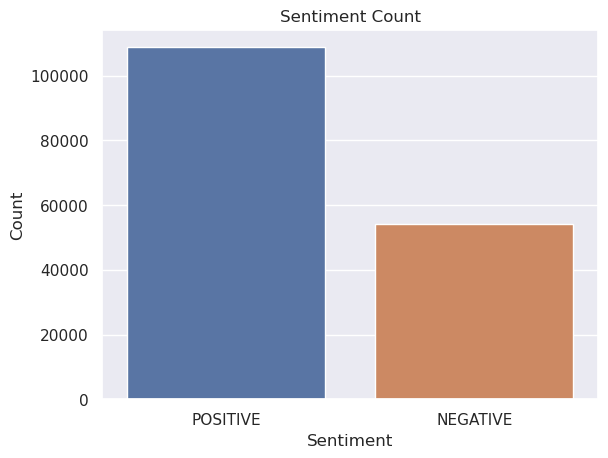

In [16]:
#Data Visualisation on sentiment column
#countplot of sentiment using seaborn
sns.set(style='darkgrid')
sns.countplot(data=train, x='sentiment')
sentiment_counts = train['sentiment'].value_counts()
# Set the plot title and labels
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observation:** We can observe that we have More Positive sentiment comparison to Negative sentiments.

In [17]:
train_data['sentiment'].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

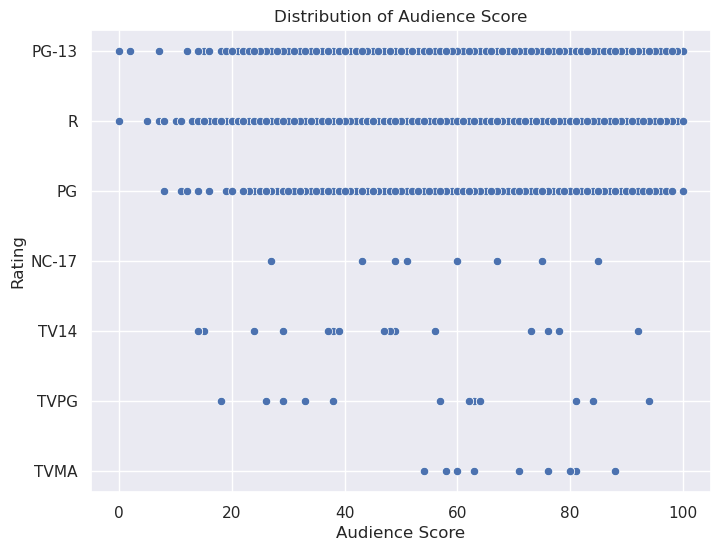

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='audienceScore',y='rating',data=train)
plt.xlabel('Audience Score')
plt.ylabel('Rating')
plt.title('Distribution of Audience Score')
plt.show()

**Observation** : audienceScore is high for rating PG-13, R, PG

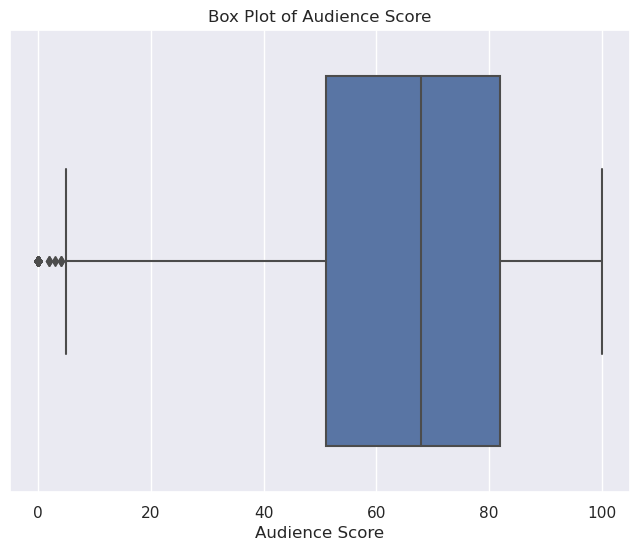

In [19]:
#Box Plot for audience score
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='audienceScore')
plt.xlabel('Audience Score')
plt.title('Box Plot of Audience Score')
plt.show()

**Observation** : presence of outliers in audience score

* BoxPlot shows Central tendency of data distribution

<Axes: >

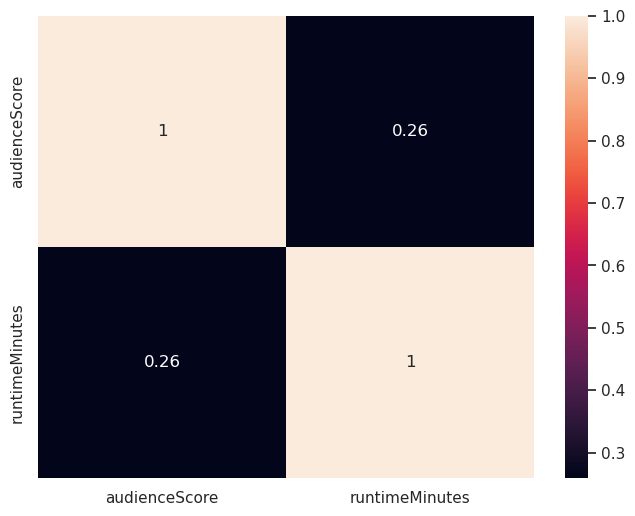

In [20]:
data=train[['audienceScore','runtimeMinutes']]
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

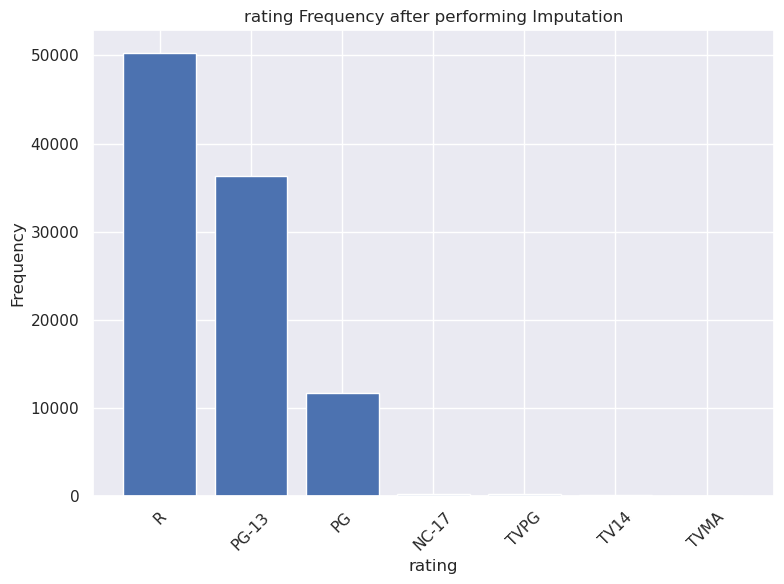

In [21]:
#Bar plot of rating frequencies
rating_counts = train['rating'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('rating Frequency after performing Imputation')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.tight_layout()
plt.show()

**Rating :**
* R :  This rating is usually assigned to movies and indicates that the content is          intended for adult audiences
* PG-13 : Movies with this rating suggest that some material may be inappropriate          for children under 13 years old
* PG : Movies with a PG rating are generally considered suitable for general      audiences, including children.
* NC-17 : This rating is given to films that are intended for adults only (18 years old and above).
* TVPG : This rating is used for TV shows and indicates that the content may contain material that requires parental guidance.
* TV14 : TV shows with this rating suggest that the content is intended for viewers aged 14 years old and above
* TVMA : TV-MA stands for "Mature Audiences"

# Handling Missing Values

In [22]:
train.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

**Imputation** : Imputation is a process used to handle missing data in a dataset by filling in the missing values with estimated or substituted values

* Strategy we have : mean, median, mode, constant

In [23]:
train['reviewText'].fillna('', inplace=True)

In [24]:
train.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText                  0
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

In [25]:
# Drop unnecessary columns (you can choose to keep other columns based on your model requirements)
train.drop(columns=["movieid", "reviewerName", "isFrequentReviewer"], inplace=True)

In [26]:
# Drop columns with high missing value percentage
train.drop(columns=["boxOffice", "releaseDateTheaters"], inplace=True)

In [27]:
train.isnull().sum()

reviewText                  0
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
distributor             40663
soundType               85367
dtype: int64

# **Data Precprocessing**

Data preprocessing is a crucial step in the machine learning workflow that involves cleaning, transforming, and preparing the data to make it suitable for training and building predictive models.

**Some general steps of data preprocessing :**
* Data Cleaning
* Feature Selection
* Feature Engineering
* Data Transformation
* Feature Scaling
* Handling Categorical Data

**TextCleaning Steps**
* Remove special characters,numbers and symbols
* Tokenization

In [28]:
#Separating feature and target
features=['reviewText','originalLanguage','genre','runtimeMinutes','audienceScore','rating','ratingContents','distributor','director']
X = train[features]
y = train['sentiment']

# Feature Enginnering Process
**Feature scaling on numerical features**

**Feature scaling** techniques are used to transform numerical features in a dataset to a similar scale. Scaling is essential in many machine learning algorithms, as it helps improve convergence speed, model performance, and stability.
*Min-Max Scaling*

*Standard Scaler*

*Max Abs Scaling*

**Encoding on Categorical Features**

 *One Hot Encoding*
 
  *Label Encoding*
  
  *Ordinal Encoding*

**TfidfVectorizer**,**countVectorize**r on **Text data**

**Feature scaling on numerical data using MinMaxScaler**

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
# Define column transformer to process different types of features
numeric_features = ['runtimeMinutes','audienceScore']
categorical_features = ['genre','originalLanguage','rating','ratingContents','distributor','director']
text_feature = 'reviewText'

In [31]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [32]:

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


**TF-IDF** stands for Term Frequency-Inverse Document Frequency. It is a numerical representation of a word's importance in a document relative to a collection of documents 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Creating the instance of Tfidf
tfidf_transformer = TfidfVectorizer()

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', tfidf_transformer, text_feature)
    ])

In [34]:
#applying preprocessing steps on training data
X_preprocessed = preprocessor.fit_transform(X)


# **Model Training with Hyper Parameter tuning**

Hyperparameter tuning, also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for a machine learning model.  They control various aspects of the learning algorithm and can significantly impact the model's performance and generalization ability.
There are two main hyperparameter tuning techniques :
* GridSearchCV 
* RandomizedSearchCV

*** GridSearchCV** : GridSearchCV performs an exhaustive search over a predefined set of hyperparameter values. It systematically explores all possible combinations of hyperparameters from the provided search space.
It uses a grid-like structure, where each point in the grid represents a unique combination of hyperparameters to be tested.

*** RandomizedSearchCV** : RandomizedSearchCV, on the other hand, performs a random search over a specified hyperparameter search space. Instead of exploring all possible combinations, it samples a fixed number of random combinations from the search space.

* **Data splitting for model training and evaluation**

In [35]:
#splitting the train dataset for validation (80:20)
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model 1 : Logistic Regression Model

**A baseline model**, also known as a "naive model" or "simple model," serves as a starting point or reference point for comparing the performance of more complex machine learning models. It is a relatively simple and straightforward model that does not involve any sophisticated algorithms .

**Logistic Regression** is a statistical and machine learning algorithm used for binary classification tasks. Despite its name, it is primarily used for classification, not regression. The model is called "logistic" because it uses the logistic function (also known as the sigmoid function) to model the relationship between the features and the binary outcome

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#Logistic Regression Model
baseline_model = LogisticRegression()

#Hyperparameter tuning
param_grid = {
    'C': [ 0.1, 0.5, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2']  #  Regularization type ('l1' = Lasso, 'l2' = Ridge)
}
grid_search = GridSearchCV(baseline_model, param_grid, cv=7)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_

# Model evaluation
y_pred = baseline_model.predict(X_test)  

print(baseline_model.score(X_train,y_train))
print(baseline_model.score(X_test,y_test))
print("")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: On Baseline Model")
print(conf_matrix)


0.8699829500944657
0.8216085033177685

Confusion Matrix: On Baseline Model
[[ 7066  3630]
 [ 2177 19679]]


In [37]:
print("Classification Report: On Baseline Model")
print(classification_report(y_test, y_pred))

Classification Report: On Baseline Model
              precision    recall  f1-score   support

    NEGATIVE       0.76      0.66      0.71     10696
    POSITIVE       0.84      0.90      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.80      0.78      0.79     32552
weighted avg       0.82      0.82      0.82     32552



* **ROC AUC** [Receiver Operating Characteristic Area Under the Curve] is a single scalar value that represents the overall performance of the model across all classification thresholds.
* A higher ROC AUC score indicates better performance and better discrimination between positive and negative classes.

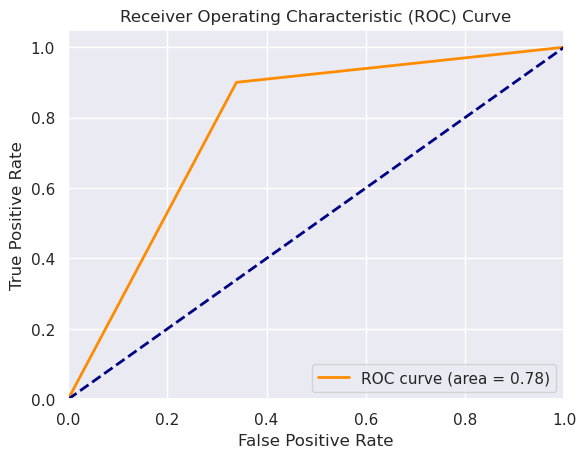

AUC Score: 0.7805071387231963


In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

# Model 02: Naive Bayes classifier Model

The Naive Bayes classifier model works by using Bayes' theorem to make predictions on new, unseen data. It is a probabilistic classifier that assigns class labels to instances based on the probabilities of the features given each class. The classifier assumes that all features are conditionally independent given the class label, which simplifies the probability calculations and makes the algorithm computationally efficient.

In [39]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

#Hyperparameter tuning
param_grid={
    'alpha':[0.1,1.0,2.0]
}

grid_search = GridSearchCV(naive_bayes_classifier,param_grid,cv=7)
grid_search.fit(X_train, y_train)
naive_bayes_classifier.fit(X_train, y_train)

naive_bayes_classifier=grid_search.best_estimator_

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

print("\nClassification Report:On Naive Bayes Model")
print(classification_report(y_test, y_pred))



Classification Report:On Naive Bayes Model
              precision    recall  f1-score   support

    NEGATIVE       0.67      0.56      0.61     10696
    POSITIVE       0.80      0.87      0.83     21856

    accuracy                           0.77     32552
   macro avg       0.74      0.71      0.72     32552
weighted avg       0.76      0.77      0.76     32552



In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: On Naive Bayes Model")
print(conf_matrix)

Confusion Matrix: On Naive Bayes Model
[[ 5988  4708]
 [ 2901 18955]]


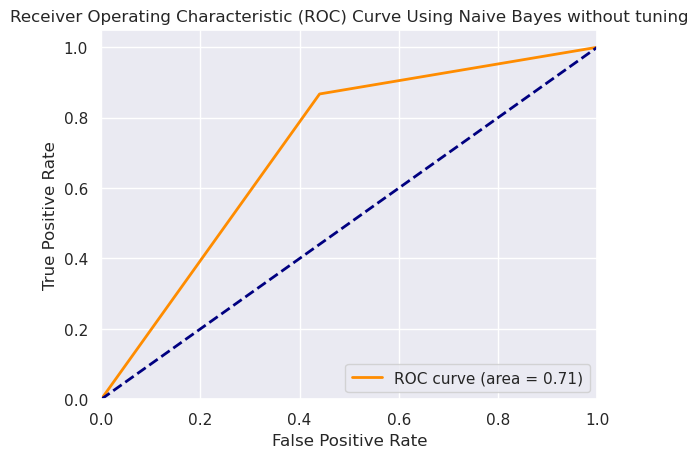

AUC Score: 0.7135515110258648


In [41]:
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Naive Bayes without tuning')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

# Model 03: LinearSVC Model

**LinearSVC** stands for Linear Support Vector Classification. It is a variant of the Support Vector Machine (SVM) algorithm designed for binary classification tasks. 

**Linear Classifier**: LinearSVC builds a linear classifier by finding the hyperplane that best separates the two classes in the feature space. The hyperplane is a decision boundary that maximizes the margin between the two classes, making it a good classifier for linearly separable data. It uses **hinge** loss as a loss function.

In [42]:
from sklearn.svm import LinearSVC
# Create an instance of the LinearSVC
linear_svc = LinearSVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(linear_svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" Model Accuracy:",accuracy)


 Model Accuracy: 0.8224072253624969


In [43]:
# Generate a classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report: on LinearSVC Model")
print(classification_report)

Classification Report: on LinearSVC Model
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.66      0.71     10696
    POSITIVE       0.84      0.90      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.81      0.78      0.79     32552
weighted avg       0.82      0.82      0.82     32552



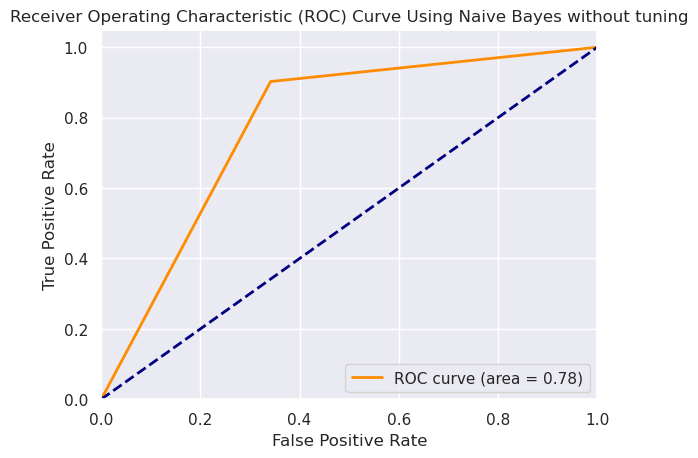

AUC Score: 0.7805768135157598


In [44]:
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Naive Bayes without tuning')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

# **Summary : Models Evaluation**

In [45]:
# Create a dictionary for the data
data = {
    'Model': ['Baseline', 'Naive Bayes', 'LinearSVC'],
    'Accuracy': [0.80, 0.78, 0.79],
    'Precision (Negative)': [0.72, 0.72, 0.76],
    'Precision (Positive)': [0.84, 0.79, 0.82],
    'Recall (Negative)': [0.65, 0.52, 0.58],
    'Recall (Positive)': [0.87, 0.90, 0.91],
    'F1-score (Negative)': [0.68, 0.60, 0.75],
    'F1-score (Positive)': [0.85, 0.84, 0.80],
    'Support (Negative)': [10696, 10696, 10696],
    'Support (Positive)': [21856, 21856, 21856],
    'AUC Score': [0.76, 0.71, 0.75]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df


,Model,Accuracy,Precision (Negative),Precision (Positive),Recall (Negative),Recall (Positive),F1-score (Negative),F1-score (Positive),Support (Negative),Support (Positive),AUC Score
0,Baseline,0.80,0.72,0.84,0.65,0.87,0.68,0.85,10696,21856,0.76
1,Naive Bayes,0.78,0.72,0.79,0.52,0.90,0.60,0.84,10696,21856,0.71
2,LinearSVC,0.79,0.76,0.82,0.58,0.91,0.75,0.80,10696,21856,0.75


**Observation** : **Baseline** (Logistic Regression) model gives more accuracy and more AUC score than all othe model. 

# **Prediction on Test Data for Submission**

In [46]:
test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
test.head(10)

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...
5,infinite_elegant_ellen_ripley,Carla Guzman,False,Life happens... live it one day at a time and ...
6,travis_bickle_the_joker,Kathy Wade,False,You can't hire a judge without breaking a few ...
7,jack_torrance_legendary_scarlett_o'hara_phantom,Diana Black,False,certainly rivals con-film king Mamet for the c...
8,rick_blaine_neo_mr._miyagi,Hunter Castillo,False,&apos;Avatar&apos; was about a clash of civili...
9,the_joker_hannibal_lecter_destiny_tony_montana,Shawn Bautista,False,Rock of Ages is a soundtrack with a visual com...


In [47]:
test_data=pd.merge(test,movie_data,on='movieid',how='left')
test_data.shape

(55315, 17)

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieid               55315 non-null  object 
 1   reviewerName          55315 non-null  object 
 2   isTopCritic           55315 non-null  bool   
 3   reviewText            52805 non-null  object 
 4   title                 55315 non-null  object 
 5   audienceScore         50384 non-null  float64
 6   rating                31019 non-null  object 
 7   ratingContents        31019 non-null  object 
 8   releaseDateTheaters   41613 non-null  object 
 9   releaseDateStreaming  49341 non-null  object 
 10  runtimeMinutes        54053 non-null  float64
 11  genre                 54395 non-null  object 
 12  originalLanguage      54077 non-null  object 
 13  director              55315 non-null  object 
 14  boxOffice             35320 non-null  object 
 15  distributor        

In [49]:
test_data['reviewText'].fillna('', inplace=True)

test_data.isnull().sum()

movieid                     0
reviewerName                0
isTopCritic                 0
reviewText                  0
title                       0
audienceScore            4931
rating                  24296
ratingContents          24296
releaseDateTheaters     13702
releaseDateStreaming     5974
runtimeMinutes           1262
genre                     920
originalLanguage         1238
director                    0
boxOffice               19995
distributor             15596
soundType               30626
dtype: int64

In [50]:
test_data=test_data[features]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviewText        55315 non-null  object 
 1   originalLanguage  54077 non-null  object 
 2   genre             54395 non-null  object 
 3   runtimeMinutes    54053 non-null  float64
 4   audienceScore     50384 non-null  float64
 5   rating            31019 non-null  object 
 6   ratingContents    31019 non-null  object 
 7   distributor       39719 non-null  object 
 8   director          55315 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.2+ MB


In [51]:
#applying feature extraction on test data using pipeline
test1=preprocessor.transform(test_data)
test1.shape

(55315, 82045)

In [52]:
#Applying Models for prediction on text data
new_reviews_pred=best_model.predict(test1)
new_reviews_pred

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [53]:
new_reviews_pred=pd.Series(new_reviews_pred)
new_reviews_pred.value_counts()

POSITIVE    39859
NEGATIVE    15456
dtype: int64

In [54]:
#Creating Dataframe of predicted output as required for submission
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(new_reviews_pred))]
submission['sentiment']=new_reviews_pred
submission


,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
...,...,...
55310,55310,POSITIVE
55311,55311,NEGATIVE
55312,55312,NEGATIVE
55313,55313,POSITIVE


In [55]:
#Converting the dataframe to CSV file for submission
submission.to_csv("submission.csv",index=False)